In [1]:
import ROOT as rt
import array as array
import os
import glob
from random import gauss
import numpy as np
import root_numpy as rtnpy
import pandas as pd
import h5py
from awkward import JaggedArray, Table
import matplotlib.pyplot as plt
import seaborn as sns

Welcome to JupyROOT 6.14/09


In [2]:
lumi=5750+2573+4242+4025+3104+7576+8632
print lumi
CrossSection=np.array([1973000000,117200,7760,642.1,185.9,32.05,9.365,0.8398,0.1124,0.006752,0.0001626])
EventNumber=np.array([3520.33,6875125,4150588,9344512.12,6571952,8456672.59,6680029,831433,692968,834414,11166471])
Scale=lumi*CrossSection/EventNumber
print Scale
MC_Compo=np.array(['QCD Flat','QCD Pt170to300','QCD Pt300to470','QCD Pt470to600','QCD Pt600to800','QCD Pt800to1000','QCD Pt1000to1400','QCD Pt1400to1800','QCD Pt1800to2400','QCD Pt2400to3200','QCD Pt3200toInf'])

35902
[2.01215926e+10 6.12020058e+02 6.71229040e+01 2.46697462e+00
 1.01555547e+00 1.36065230e-01 5.03324507e-02 3.62632943e-02
 5.82333499e-03 2.90515624e-04 5.22785149e-07]


In [3]:
fData=[]
path='/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_JetHTRun2016*.root'
files=glob.glob(path)
for f in files:
    fData.append(f)
print len(fData)
fMC=[
    '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_QCD_Pt-15to7000_TuneCUETP8M1_FlatP6_13TeV_pythia8.root',
    '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_QCD_Pt_170to300_TuneCUETP8M1_13TeV_pythia8.root',
    '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_QCD_Pt_300to470_TuneCUETP8M1_13TeV_pythia8.root',
    '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_QCD_Pt_470to600_TuneCUETP8M1_13TeV_pythia8.root',
    '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_QCD_Pt_600to800_TuneCUETP8M1_13TeV_pythia8.root',
    '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_QCD_Pt_800to1000_TuneCUETP8M1_13TeV_pythia8.root',
    '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_QCD_Pt_1000to1400_TuneCUETP8M1_13TeV_pythia8.root',
    '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_QCD_Pt_1400to1800_TuneCUETP8M1_13TeV_pythia8.root',
    '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_QCD_Pt_1800to2400_TuneCUETP8M1_13TeV_pythia8.root',
    '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_QCD_Pt_2400to3200_TuneCUETP8M1_13TeV_pythia8.root',
    '/t3home/algomez/work/Files/jetObservables/v02/jetObservables_histograms_QCD_Pt_3200toInf_TuneCUETP8M1_13TeV_pythia8.root'
    ]

print len(fMC)

7
11


In [32]:
def Fill(h0,h,r):
    N=h.GetNbinsX()
    #print N,r,o
    for i in range(1,N+1):
        a=0
        for j in range(r):
            a+=h0.GetBinContent(i*r+j-r+1)
        h.SetBinContent(i,a)
def Fill2d(h0,h,rx,ry):
    Nx=h.GetNbinsX()
    Ny=h.GetNbinsY()
    for i in range(1,1+Nx):
        for j in range(1,1+Ny):
            a=0
            for k in range(rx):
                for l in range(ry):
                    a+=h0.GetBinContent(i*rx+k-rx+1,j*ry+l-ry+1)
            h.SetBinContent(i,j,a)
def Norm(h):
    N=h.GetNbinsX()
    a=0
    for i in range(N):
        a+=h.GetBinContent(i+1)
    return a

In [66]:
tau21rec='recoJetTau21_nom_dijetSel'
tau21gen='genJetTau21_dijetSel'
response='respJetTau21_nom_dijetSel'

#tau21rec='recoJet_tau_0p5_1_WTA_kT_nom_dijetSel'
#tau21gen='genJet_tau_0p5_1_WTA_kT_dijetSel'
#response='respJet_tau_0p5_1_WTA_kT_nom_dijetSel'

In [112]:
f_Data=np.zeros((len(fData),),dtype=rt.TFile)
HistDataReco=rt.TH1D("reco #tau_{21},data","#tau_{21},data;#tau_{21};Events",20,0,1)
for i in range(len(fData)):
    f_Data[i]=rt.TFile.Open(fData[i],'read')
    t=f_Data[i].Get('jetObservables')
    hist=rt.TH1D("",";;",20,0,1)
    Fill(t.Get(tau21rec),hist,5)
    HistDataReco.Add(hist)
    f_Data[i].Close()
    
f_MC=np.zeros((len(fMC),),dtype=rt.TFile)

HistMCReco1=rt.TH1D("reco #tau_{21},QCD Flat","#tau_{21},QCD Flat;#tau_{21};Events",20,0,1)
HistMCGen1=rt.TH1D("gen #tau_{21},QCD Flat","#tau_{21},QCD Flat;#tau_{21};Events",10,0,1)
Response1=rt.TH2D("Response matrix,QCD Flat","Response matrix,QCD Flat;gen #tau_{21};reco #tau_{21};",10,0,1,20,0,1)

i=0
f_MC[i]=rt.TFile.Open(fMC[i],'read')
t=f_MC[i].Get('jetObservables')
hist=rt.TH1D("",";;",20,0,1)
Fill(t.Get(tau21rec),hist,5)
HistMCReco1.Add(hist,Scale[i])
hist=rt.TH1D("",";;",10,0,1)
Fill(t.Get(tau21gen),hist,10)
HistMCGen1.Add(hist,Scale[i])
hist=rt.TH2D("",";;",10,0,1,20,0,1)
Fill2d(t.Get(response),hist,10,5)
Response1.Add(hist,Scale[i])
f_MC[i].Close()

HistMCReco2=rt.TH1D("reco #tau_{21},QCD","#tau_{21},QCD;#tau_{21};Events",20,0,1)
HistMCGen2=rt.TH1D("gen #tau_{21},QCD","#tau_{21},QCD;#tau_{21};Events",10,0,1)
Response2=rt.TH2D("Response matrix,QCD","Response matrix,QCD;gen #tau_{21};reco #tau_{21};",10,0,1,20,0,1)

for i in range(1,len(fMC)):
    f_MC[i]=rt.TFile.Open(fMC[i],'read')
    t=f_MC[i].Get('jetObservables')
    hist=rt.TH1D("",";;",20,0,1)
    Fill(t.Get(tau21rec),hist,5)
    HistMCReco2.Add(hist,Scale[i])
    hist=rt.TH1D("",";;",10,0,1)
    Fill(t.Get(tau21gen),hist,10)
    HistMCGen2.Add(hist,Scale[i])
    hist=rt.TH2D("",";;",10,0,1,20,0,1)
    Fill2d(t.Get(response),hist,10,5)
    Response2.Add(hist,Scale[i])
    f_MC[i].Close()

print Norm(HistDataReco),Norm(HistMCReco1),Norm(HistMCGen1),Norm(HistMCReco2),Norm(HistMCGen2)

HistDataReco.Scale(1.0/Norm(HistDataReco))
HistMCReco1.Scale(1.0/Norm(HistMCReco1))
HistMCGen1.Scale(1.0/Norm(HistMCGen1))
HistMCReco2.Scale(1.0/Norm(HistMCReco2))
HistMCGen2.Scale(1.0/Norm(HistMCGen2))

25976339.0 15715162.6206 14557533.2536 21293166.7653 19111467.7521


Warning in <TROOT::Append>: Replacing existing TH1: reco #tau_{21},data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: reco #tau_{21},QCD Flat (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: gen #tau_{21},QCD Flat (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Response matrix,QCD Flat (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: reco #tau_{21},QCD (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: gen #tau_{21},QCD (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Response matrix,QCD (Potential memory leak).


In [113]:
HistDataReco.Sumw2()
HistDataReco.SetMarkerSize(0.5)
HistDataReco.SetMarkerColor(rt.kBlack)
HistDataReco.SetMarkerStyle(20)
HistDataReco.SetLineColor(rt.kBlack)
HistDataReco.SetStats(0)

HistMCReco1.SetLineColor(rt.kGreen+3)
HistMCReco1.SetFillColor(0)
HistMCReco1.SetStats(0)
HistMCGen1.SetLineColor(rt.kGreen)
HistMCGen1.SetFillColor(0)
HistMCGen1.SetStats(0)

HistMCReco2.SetLineColor(rt.kAzure+8)
HistMCReco2.SetFillColor(0)
HistMCReco2.SetStats(0)
HistMCGen2.SetLineColor(rt.kAzure)
HistMCGen2.SetFillColor(0)
HistMCGen2.SetStats(0)

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


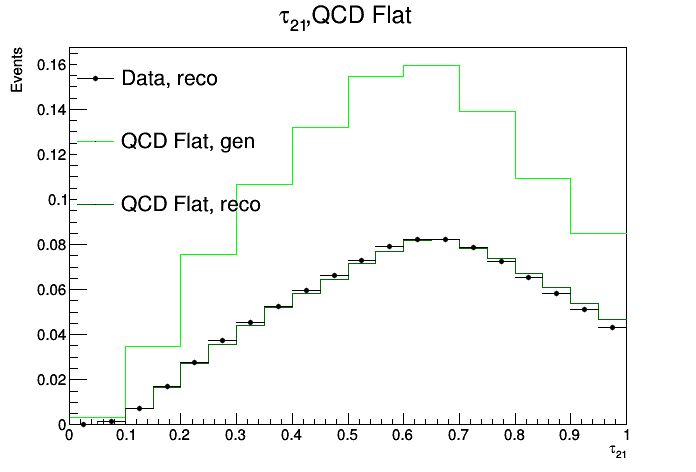

In [114]:
c1=rt.TCanvas()
HistMCGen1.Draw("hist")
#HistMCGen2.Draw("histsame")
HistMCReco1.Draw("histsame")
#HistMCReco2.Draw("histsame")
HistDataReco.Draw("e0same")
c1.Draw()
l1=rt.TLegend(0.1,0.5,0.4,0.9)
l1.AddEntry(HistDataReco,"Data, reco")
l1.AddEntry(HistMCGen1,"QCD Flat, gen")
l1.AddEntry(HistMCReco1,"QCD Flat, reco")
#l1.AddEntry(HistMCGen2,"QCD, gen")
#l1.AddEntry(HistMCReco2,"QCD, reco")
l1.SetLineColor(0)
l1.SetBorderSize(0)
l1.SetFillStyle(0)
l1.Draw("same")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Reponse


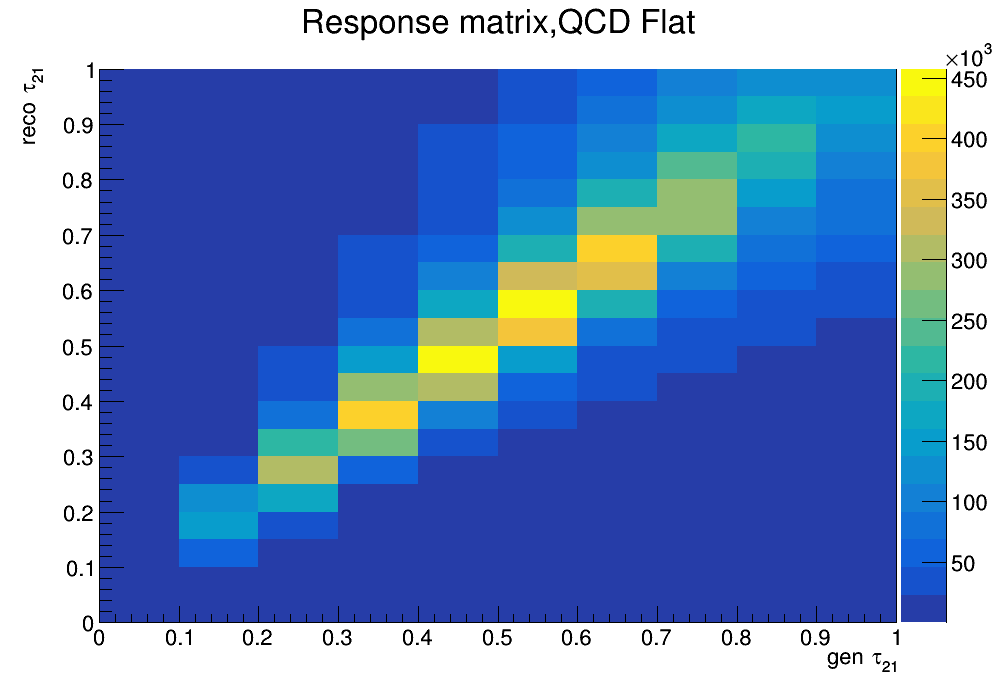

In [115]:
Response1.SetStats(0)
Response2.SetStats(0)
c2=rt.TCanvas("Reponse","Response",0,0,1000,720)
#c2.Divide(2,1)
#c2.cd(1)
Response1.Draw("Colz")
#c2.cd(2)
#Response2.Draw("Colz")
c2.Draw()

In [116]:
tunfolderMC1 = rt.TUnfoldDensity(Response1,rt.TUnfold.kHistMapOutputHoriz,rt.TUnfold.kRegModeCurvature, rt.TUnfold.kEConstraintNone, rt.TUnfoldDensity.kDensityModeBinWidth)
tunfolderMC1.SetInput(HistMCReco1)
unfoldedMC1=tunfolderMC1.DoUnfold(0.)
unfoldedMC1=tunfolderMC1.GetOutput("unfoldedMC1")

Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 20 input bins and 10 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:gen #tau_{21}[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (xaxis:gen #tau_{21}[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=1 axisSteering=*[UOB]
Warning in <TROOT::Append>: Replacing existing TH1: unfoldedMC1 (Potential memory leak).


In [117]:
tunfolderData1 = rt.TUnfoldDensity(Response1,rt.TUnfold.kHistMapOutputHoriz,rt.TUnfold.kRegModeCurvature, rt.TUnfold.kEConstraintNone, rt.TUnfoldDensity.kDensityModeBinWidth)
tunfolderData1.SetInput(HistDataReco)
unfoldedData1=tunfolderData1.DoUnfold(0.)
unfoldedData1=tunfolderData1.GetOutput("unfoldedData1")

Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 20 input bins and 10 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:gen #tau_{21}[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (xaxis:gen #tau_{21}[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing xaxis regMode=3 densityMode=1 axisSteering=*[UOB]
Warning in <TROOT::Append>: Replacing existing TH1: unfoldedData1 (Potential memory leak).


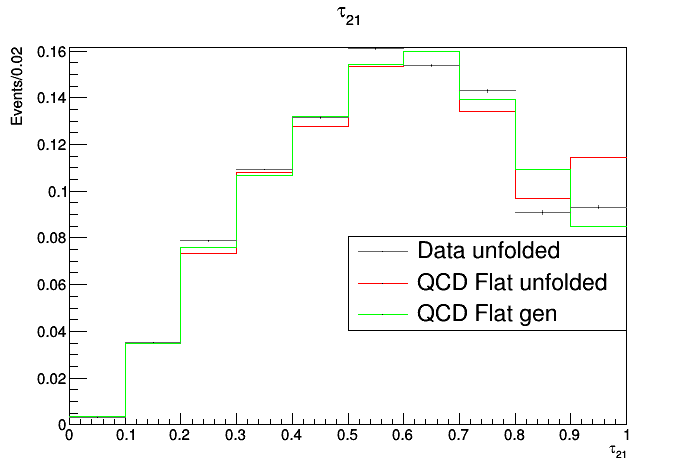

In [118]:
c3=rt.TCanvas()
unfoldedMC1.SetTitle("#tau_{21};#tau_{21};Events/0.02")
unfoldedMC1.SetLineColor(rt.kRed)
unfoldedMC1.SetFillColor(0)
unfoldedMC1.SetStats(0)
unfoldedData1.SetLineColor(rt.kGray+2)
unfoldedData1.SetFillColor(0)
unfoldedData1.SetStats(0)

unfoldedMC1.Draw("hist")
HistMCGen1.Draw("histsame")
unfoldedData1.Draw("e0same")
c3.Draw()
leg1=rt.TLegend(0.5,0.3,0.9,0.5)
leg1.AddEntry(unfoldedData1,"Data unfolded")
leg1.AddEntry(unfoldedMC1,"QCD Flat unfolded")
leg1.AddEntry(HistMCGen1,"QCD Flat gen")
leg1.Draw("same")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


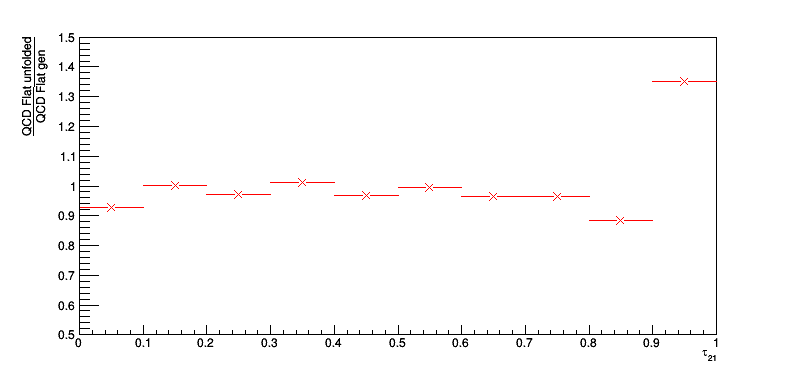

In [119]:
ratio1=rt.TH1D("",";#tau_{21};#frac{QCD Flat unfolded}{QCD Flat gen}",10,0,1)
ratio1.Add(unfoldedMC1)
ratio1.Divide(HistMCGen1)
ratio1.SetStats(0)
ratio1.SetMarkerStyle(5)
ratio1.SetMarkerColor(rt.kRed)
ratio1.SetLineColor(rt.kRed)
ratio1.GetYaxis().SetRangeUser(0.5,1.5)
c4=rt.TCanvas("","",0,0,800,400)
ratio1.Draw("e0")
c4.Draw()

In [120]:
Estats1=tunfolderData1.GetEmatrixInput("unfolding stat error matrix")
Etotal1=tunfolderData1.GetEmatrixTotal("unfolding total error matrix")
HistDataUnfStats1=rt.TH1D("Unfolded #tau_{21} with statistical errors,data","Unfolded #tau_{21};#tau_{21};Events/0.1",10,0,1)
HistDataUnfTotal1=rt.TH1D("Unfolded #tau_{21} with total errors,data","Unfolded #tau_{21};#tau_{21};Events/0.1",10,0,1)
for i in range(1,11):
    HistDataUnfStats1.SetBinContent(i,unfoldedData1.GetBinContent(i))
    HistDataUnfTotal1.SetBinContent(i,unfoldedData1.GetBinContent(i))
    HistDataUnfStats1.SetBinError(i,np.sqrt(Estats1.GetBinContent(i,i)))
    HistDataUnfTotal1.SetBinError(i,np.sqrt(Etotal1.GetBinContent(i,i)))
HistCorr1=rt.TH2D("Correlation","Correlation;#tau_{21};#tau_{21}",10,0,1,10,0,1)
for i in range(1,11):
    ex=np.sqrt(Etotal1.GetBinContent(i,i))
    for j in range(1,11):
        ey=np.sqrt(Etotal1.GetBinContent(j,j))
        HistCorr1.SetBinContent(i,j,Etotal1.GetBinContent(i,j)/ex/ey)

Warning in <TROOT::Append>: Replacing existing TH1: unfolding stat error matrix (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: unfolding total error matrix (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Unfolded #tau_{21} with statistical errors,data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Unfolded #tau_{21} with total errors,data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Correlation (Potential memory leak).


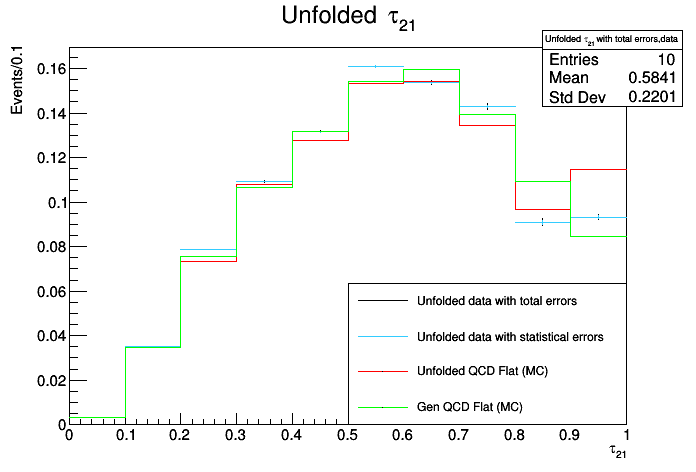

In [123]:
c5=rt.TCanvas()
HistDataUnfTotal1.SetLineColor(rt.kBlack)
HistDataUnfTotal1.SetMarkerColor(rt.kBlack)
HistDataUnfStats1.SetLineColor(rt.kAzure+8)
HistDataUnfStats1.SetMarkerColor(rt.kAzure+8)
HistDataUnfTotal1.Draw("E")
HistDataUnfStats1.Draw("Esame")
unfoldedMC1.Draw("histsame")
HistMCGen1.Draw("histsame")
c5.Draw()

leg2=rt.TLegend(0.5,0.1,0.9,0.4)
leg2.AddEntry(HistDataUnfTotal1,"Unfolded data with total errors")
leg2.AddEntry(HistDataUnfStats1,"Unfolded data with statistical errors")
leg2.AddEntry(unfoldedMC1,"Unfolded QCD Flat (MC)")
leg2.AddEntry(HistMCGen1,"Gen QCD Flat (MC)")
leg2.Draw("Same")

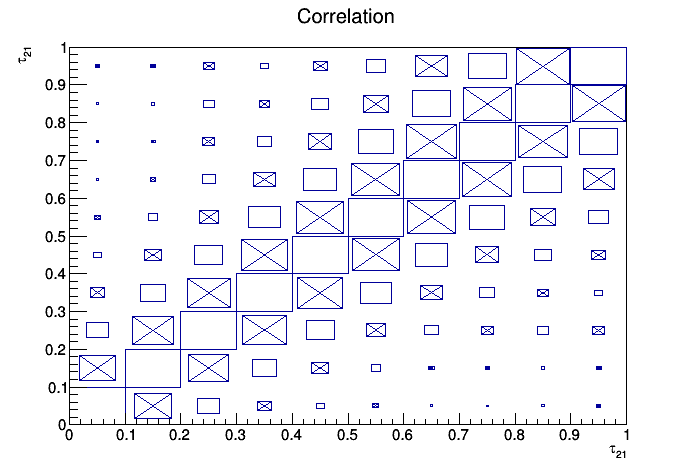

In [125]:
c6=rt.TCanvas()
HistCorr1.SetStats(0)
HistCorr1.Draw("Box")
c6.Draw()